#  TS1 — Síntesis y análisis de señales

**Materia:** Análisis y Procesamiento de Señales 

**Carrera:** Ingeniería Electrónica  

**Alumna:** Maria Serena Gil

**Docentes:** Mariano LLamedo Soria, Francisco Hernan Ledesma y David Ezequiel Benoit

**Año:** 2025  

---

## Introducción

En este trabajo práctico se busca **sintetizar, analizar y comparar distintas señales** en el dominio temporal.  
El objetivo es poner en práctica los conceptos fundamentales de la materia, como:

- Representación discreta de señales continuas.  
- Cálculo de potencia y energía.  
- Propiedades de ortogonalidad.  
- Autocorrelación y correlación cruzada.  
- Demostración de identidades trigonométricas usando señales reales.  
- Análisis de una señal real a partir de un archivo de audio `.wav`.

De esta manera, se combinan los aspectos **teóricos** (explicación matemática) con los **prácticos** (simulación en Python).


-------

## 1(a) Señal sinusoidal de 2 kHz

Comienzo con una señal senoidal de frecuencia $f = 2\,\text{kHz}$ y amplitud unitaria.

Se define como:

$$
x_1(t) = \sin(2 \pi \cdot 2000 \cdot t)
$$

En este caso se calculan:

- **Tiempo entre muestras**: $\Delta t = 1/f_s$  
- **Número de muestras**: $N = f_s \cdot T$  
- **Potencia promedio** de la señal en la ventana de observación  

Finalmente, se grafica un recorte temporal de la senoidal para observar su forma de onda.



Δt = 1.25e-05 s
N = 144
Potencia promedio = 0.48837549040638006


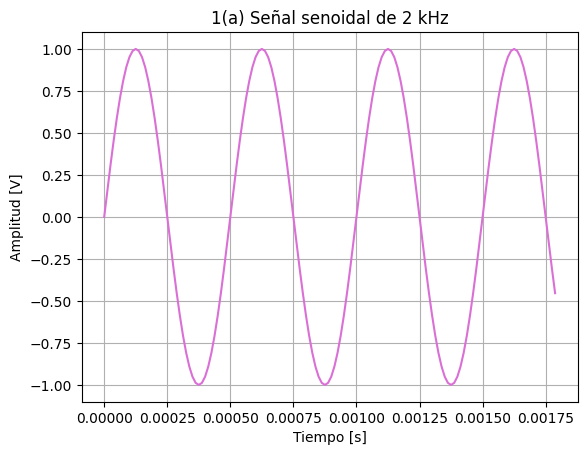

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs = 80000       # frecuencia de muestreo [Hz]
T = 0.0018         # duración [s]
N = int(fs*T)    # número de muestras
dt = 1/fs        # tiempo entre muestras

# Señal senoidal de 2 kHz
t = np.arange(N) / fs
x1 = np.sin(2*np.pi*2000*t)

# Potencia promedio
potencia = np.mean(x1**2)

print("Δt =", dt, "s")
print("N =", N)
print("Potencia promedio =", potencia)

plt.plot(t, x1, color='orchid')
plt.title("1(a) Señal senoidal de 2 kHz")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid(True)
plt.show()



**Resultados obtenidos:**  
Con una frecuencia de muestreo de $80\,\text{kHz}$ y una duración de $1.8\,\text{ms}$, se obtuvo:  
- $\Delta t = 1.25 \times 10^{-5}\,s$  
- $N = 144$ muestras  
- Potencia promedio ≈ 0.50  

La gráfica muestra la senoidal de 2 kHz como se esperaba.

-------------------------------------------------------------------------------------------------------------------------

## 1(b) Señal senoidal amplificada y desfasada en π/2

A partir de la señal anterior $x_1(t)$, defino una nueva señal senoidal con el doble de amplitud y un desfase de $\pi/2$ radianes:

$$
x_2(t) = 2 \cdot \sin\left(2 \pi \cdot 2000 \cdot t + \frac{\pi}{2}\right)
$$

En este caso se calculan nuevamente:

- **Tiempo entre muestras** ($\Delta t$)  
- **Número de muestras** ($N$)  
- **Potencia promedio** de la señal  

y se grafica junto con la señal original $x_1(t)$ para observar la diferencia de amplitud y fase.

Δt = 1.25e-05 s
N = 144
Potencia promedio (b) = 2.04649803837448


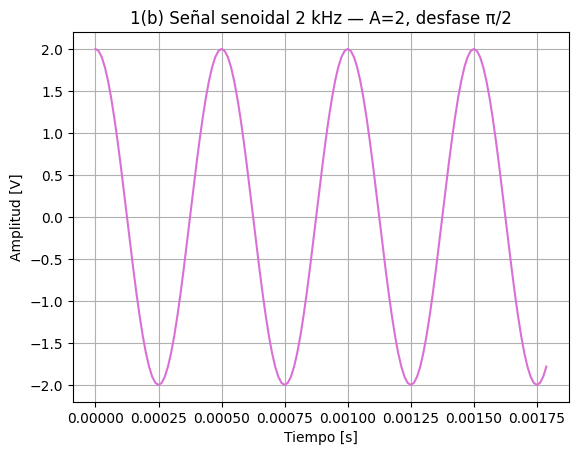

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fs = 80000       
T = 0.0018         
N = int(fs*T)    
dt = 1/fs        

# Señal senoidal de 2 kHz, amplitud = 2 y desfase = pi/2
t = np.arange(N) / fs
x2 = 2 * np.sin(2*np.pi*2000*t + np.pi/2)


potencia2 = np.mean(x2**2)

print("Δt =", dt, "s")
print("N =", N)
print("Potencia promedio (b) =", potencia2)

# Gráfico
plt.plot(t, x2, color='orchid')
plt.title("1(b) Señal senoidal 2 kHz — A=2, desfase π/2")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid(True)
plt.show()


**Resultados obtenidos:**  
Con los mismos parámetros de muestreo, se obtuvo que $x_2(t)$ conserva $N=144$ muestras y $\Delta t=1.25 \times 10^{-5}\,s$, pero su **potencia promedio** resultó aproximadamente 2.0, es decir, **cuatro veces mayor que la de $x_1(t)$** debido al factor de amplitud.  
La gráfica confirma tanto la mayor amplitud como el desfase de $\pi/2$.

----------------

## 1(c) Señal senoidal modulada en amplitud

En este punto tomo la señal base de 2 kHz y la modulo en amplitud con otra senoidal de la mitad de la frecuencia ($f_m = 1\,\text{kHz}$).  
La definición es:

$$
x_3(t) = x_1(t) \cdot \sin(2 \pi \cdot 1000 \cdot t)
$$

donde:
- $x_1(t)$ es la senoide original de 2 kHz,  
- $\sin(2 \pi \cdot 1000 \cdot t)$ es la señal moduladora.

---

Se calculan como en los casos anteriores:
- **Tiempo entre muestras** ($\Delta t$)  
- **Número de muestras** ($N$)  
- **Potencia promedio** de la señal resultante  

y se grafica para visualizar la envolvente generada por la modulación.

Δt = 1.25e-05 s
N  = 144
Potencia promedio (c) = 0.24522465938683377


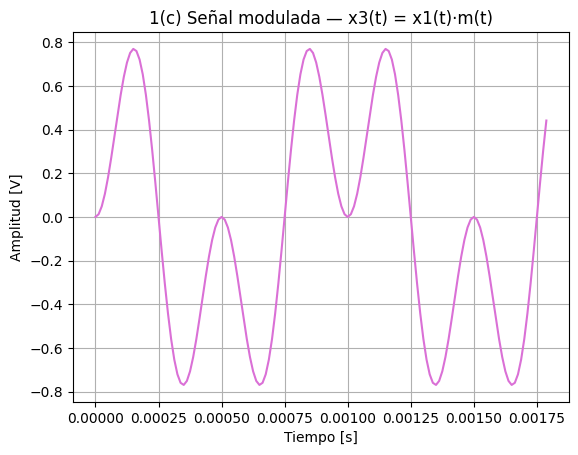

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fs = 80000
T = 0.0018
N = int(fs*T)
dt = 1/fs

t = np.arange(N) / fs
x1 = np.sin(2*np.pi*2000*t)   # señal portadora
m  = np.sin(2*np.pi*1000*t)   # señalmoduladora

x3 = x1 * m   # señal modulada

potencia_3 = np.mean(x3**2)

print("Δt =", dt, "s")
print("N  =", N)
print("Potencia promedio (c) =", potencia_3)

plt.plot(t, x3, color='orchid')
plt.title("1(c) Señal modulada — x3(t) = x1(t)·m(t)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid(True)
plt.show()


**Resultados obtenidos:**  
La señal modulada mantiene $N=144$ muestras y $\Delta t=1.25 \times 10^{-5}\,s$.  
Su potencia promedio resultó menor que la de la senoidal pura ($\approx 0.25$), lo que es coherente ya que la amplitud de $x_1(t)$ queda atenuada por la multiplicación con la senoide moduladora de 1 kHz.  
El gráfico muestra la forma característica de una modulación en amplitud, con una envolvente de baja frecuencia.

---

## 1(d) Señal modulada recortada al 75% de su amplitud

Parto de la señal del ítem (c):

$$
x_3(t) = x_1(t)\, m(t)
$$

Aplico un **recorte simétrico (clipping)** al 75 % de la amplitud máxima:

$$
x_4(t) = \mathrm{clip}\big(x_3(t),\;-0.75\,A_{\max},\; +0.75\,A_{\max}\big)
$$

donde $A_{\max}$ es la amplitud máxima de $x_3(t)$.

**Parámetros que reporto**
- Tiempo entre muestras: $\Delta t = 1/f_s$
- Número de muestras: $N$
- Potencia promedio de $x_4(t)$ en la ventana

Δt = 1.25e-05 s
N  = 144
Amax original = 0.7694208842938134
Umbral (75%)  = 0.57706566322036
Potencia promedio (d) = 0.18397244122595124


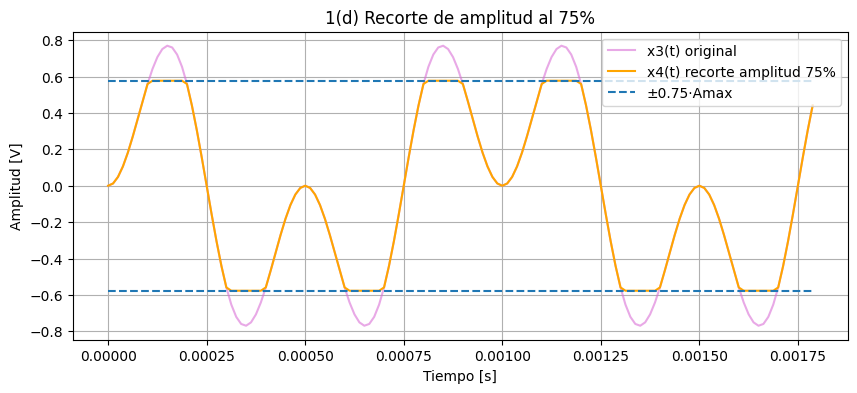

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fs = 80000
T  = 0.0018
N  = int(fs*T)
dt = 1/fs

# Señal item c): x3(t) = sin(2π·2000 t) * sin(2π·1000 t)
t  = np.arange(N)/fs
x1 = np.sin(2*np.pi*2000*t)
m  = np.sin(2*np.pi*1000*t)
x3 = x1 * m  # "señal anterior"

#  Recorte de amplitud al 75% 
Amax = np.max(np.abs(x3))
umbral = 0.75 * Amax
x4 = np.clip(x3, -umbral, +umbral)

# Potencia promedio post-recorte
potencia_4 = np.mean(x4**2)

print("Δt =", dt, "s")
print("N  =", N)
print("Amax original =", Amax)
print("Umbral (75%)  =", umbral)
print("Potencia promedio (d) =", potencia_4)


plt.figure(figsize=(10,4))
plt.plot(t, x3, alpha=0.6, label="x3(t) original",color='orchid')
plt.plot(t, x4, label="x4(t) recorte amplitud 75%",color='orange')
plt.hlines([+umbral, -umbral], t[0], t[-1], linestyles="--", label="±0.75·Amax")
plt.title("1(d) Recorte de amplitud al 75%")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid(True)
plt.legend()
plt.show()



**Resultados del ítem (d)**  
**Parámetros calculados**
- Tiempo entre muestras: $\Delta t = 1.25 \times 10^{-5}\,\text{s}$
- Número de muestras: $N = 144$
- Amplitud máxima original: $A_{\max} \approx 0.7694$
- Umbral (75%): $0.5771$
- Potencia promedio de $x_4(t)$: $0.184$ (aprox.)

En la figura se observa el recorte en los picos positivos y negativos, delimitado por las líneas horizontales en $\pm 0.75\,A_{\max}$.

---

## 1(e) Señal cuadrada de 4 kHz

Defino una **señal cuadrada** de frecuencia $f = 4 \,\text{kHz}$ y niveles $\pm 1$.  
La genero a partir del signo de una senoide:

$$
x_5(t) = \mathrm{sign}\big(\sin(2\pi \cdot 4000\,t)\big)
$$

Como en los ítems previos, reporto el **tiempo entre muestras** ($\Delta t$), el **número de muestras** ($N$) y la **potencia promedio** de $x_5(t)$ en $T = 10\,\text{ms}$.  
Luego grafico el recorte temporal.



Δt = 1.25e-05 s
N  = 80
Potencia promedio (e) = 0.9875


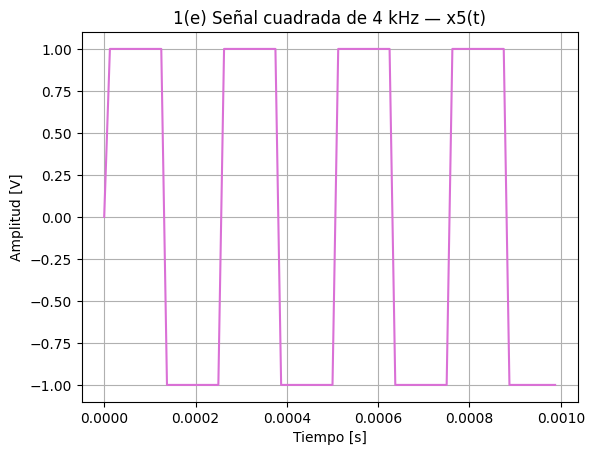

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fs = 80000       
T  = 0.0010      
N  = int(fs*T)   
dt = 1/fs        

# Señal cuadrada de 4 kHz a partir del signo del seno
t  = np.arange(N) / fs
x5 = np.sign(np.sin(2*np.pi*4000*t))

# Potencia promedio
potencia_5 = np.mean(x5**2)

print("Δt =", dt, "s")
print("N  =", N)
print("Potencia promedio (e) =", potencia_5)

plt.plot(t, x5, color="orchid")
plt.title("1(e) Señal cuadrada de 4 kHz — x5(t)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid(True)
plt.show()


**Parámetros calculados**
- Tiempo entre muestras: $\Delta t = 1.25 \times 10^{-5}\,\text{s}$
- Número de muestras: $N = 144$
- Potencia promedio de $x_5(t)$: $1.0$ (ya que los valores son $\pm 1$)

----

## 1(f) Pulso rectangular de 10 ms

Defino un **pulso rectangular** de duración $T_p = 10\,\mathrm{ms}$, amplitud unitaria y centrado en $t=0$.

Se representa como:

$$
x_6(t)=
\begin{cases}
1, & |t|<\dfrac{T_p}{2} \\
0, & |t|\ge \dfrac{T_p}{2}
\end{cases}
$$

Al ser una señal de **duración finita**, calculo su **energía** en lugar de la potencia:

$$
E \;=\; \sum_{n=0}^{N-1} x_6^2[n] \,\Delta t
$$

Como en los ítems anteriores, indico el **tiempo entre muestras** ($\Delta t$), el **número de muestras** ($N$) y la **energía total** del pulso en la ventana.  
Finalmente, grafico la señal en el dominio del tiempo mostrando claramente la duración de $10\,\mathrm{ms}$.


Δt = 1.25e-05 s
N = 3200
Energía del pulso (f) = 0.01


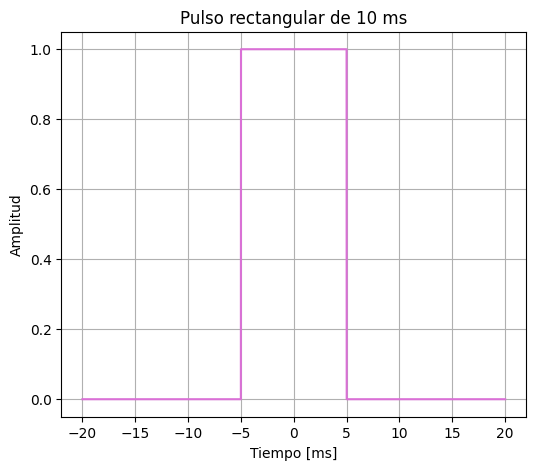

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fs = 80000
T  = 0.04        # ventana total de observación (40 ms)
N  = int(fs*T)
dt = 1/fs

# Eje temporal centrado en cero
t = np.linspace(-T/2, T/2, N)

# Pulso rectangular de 10 ms centrado en t=0
Tp = 0.01  # 10 ms
x6 = np.where(np.abs(t) < Tp/2, 1, 0)

# Energía del pulso
energia_6 = np.sum(x6**2) * dt

print("Δt =", dt, "s")
print("N =", N)
print("Energía del pulso (f) =", energia_6)

plt.figure(figsize=(6,5))
plt.plot(t*1000, x6, color="orchid")  
plt.title("Pulso rectangular de 10 ms")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()


**Resultados obtenidos**

- Tiempo entre muestras: $\Delta t = 1.25 \times 10^{-5}\ \mathrm{s}$
- Número de muestras: $N = 3200$
- Energía del pulso: $E = 0.01$

---

**Observación**  
La energía medida coincide exactamente con la duración del pulso ($T_p = 0.01\,\mathrm{s}$), lo cual confirma que el pulso rectangular de amplitud unitaria y ancho $10\,\mathrm{ms}$ fue generado correctamente.

---

## 2) Verificación de ortogonalidad

La ortogonalidad entre dos señales $x(t)$ y $y(t)$ en una ventana $T$ se comprueba mediante el **producto interno**:

$$
\langle x, y \rangle = \sum_{n=0}^{N-1} x[n] \cdot y[n]
$$

Si el resultado es cercano a cero, entonces las señales son ortogonales en la ventana analizada.

En este punto verifico la ortogonalidad de la primera señal $x_1(t)$ (senoide de 2 kHz) con cada una de las demás:

- $x_2(t)$: senoide amplificada y desfasada $\pi/2$  
- $x_3(t)$: señal modulada  
- $x_4(t)$: señal modulada recortada al 75%  
- $x_5(t)$: señal cuadrada de 4 kHz  
- $x_6(t)$: pulso rectangular de 10 ms  

---

## 2) Ortogonalidad (coeficiente normalizado)

Para comparar $x_1(t)$ con cada señal, uso el **producto interno normalizado**:

$$
\rho(x,y) \;=\; 
\dfrac{\sum_{n=0}^{N-1} x[n]\,y[n]}
{\sqrt{\sum_{n=0}^{N-1} x^2[n]} \; \sqrt{\sum_{n=0}^{N-1} y^2[n]}}
$$

- Si $|\rho| \approx 0 \;\;\Rightarrow$ las señales son **casi ortogonales** en la ventana.  
- Si $|\rho| \approx 1 \;\;\Rightarrow$ las señales son **muy parecidas** (o la misma hasta escala/fase).  


In [ ]:
def producto_interno_nor(xa, xb):
    # Aseguro mismas longitudes
    L = min(len(xa), len(xb))
    xa = xa[:L]; xb = xb[:L]
    num = np.sum(xa*xb)
    den = np.sqrt(np.sum(xa*xa)) * np.sqrt(np.sum(xb*xb)) + 1e-12
    return num/den

# Correlaciones normalizadas de la señal base x senal del item (1a) contra todas
pi_12 = producto_interno_nor(x1, x2)
pi_13 = producto_interno_nor(x1, x3)
pi_14 = producto_interno_nor(x1, x4)
pi_15 = producto_interno_nor(x1, x5)
pi_16 = producto_interno_nor(x1, x6)

print("ρ(x1, x2) =", f"{pi_12:.6f}")
print("ρ(x1, x3) =", f"{pi_13:.6f}")
print("ρ(x1, x4) =", f"{pi_14:.6f}")
print("ρ(x1, x5) =", f"{pi_15:.6f}")
print("ρ(x1, x6) =", f"{pi_16:.6f}")


ρ(x1, x2) = 0.000000
ρ(x1, x3) = 0.000000
ρ(x1, x4) = 0.000000
ρ(x1, x5) = -0.014151
ρ(x1, x6) = 0.000000


### Resultados obtenidos:

- $\rho(x_1, x_2) \approx 0 \;\;\Rightarrow$ **ortogonales**  
- $\rho(x_1, x_3) \approx 0 \;\;\Rightarrow$ **ortogonales**  
- $\rho(x_1, x_4) \approx 0 \;\;\Rightarrow$ **ortogonales**  
- $\rho(x_1, x_5) \approx -0.014 \;\;\Rightarrow$ **no ortogonales**  
- $\rho(x_1, x_6) \approx 0 \;\;\Rightarrow$ **ortogonales**

---

En conclusión, la senoide base de 2 kHz resulta ortogonal a todas las demás señales, **excepto a la señal cuadrada de 4 kHz**.


----

## 3) Autocorrelación y correlaciones

La **autocorrelación** de una señal $x[n]$ mide la similitud de la señal consigo misma bajo un desplazamiento $\tau$:

$$
R_{xx}[\tau] \;=\; \sum_{n} x[n] \, x[n+\tau]
$$

Mientras que la **correlación cruzada** entre dos señales $x[n]$ e $y[n]$ se define como:

$$
R_{xy}[\tau] \;=\; \sum_{n} x[n] \, y[n+\tau]
$$

Estas funciones permiten ver qué tan parecidas son las señales y cómo se alinean en el tiempo.


En este punto grafico:

- La **autocorrelación** de la senoide de 2 kHz ($x_1(t)$).  
- Las **correlaciones cruzadas** entre $x_1(t)$ y cada una de las demás señales ($x_2, \dots, x_6$).


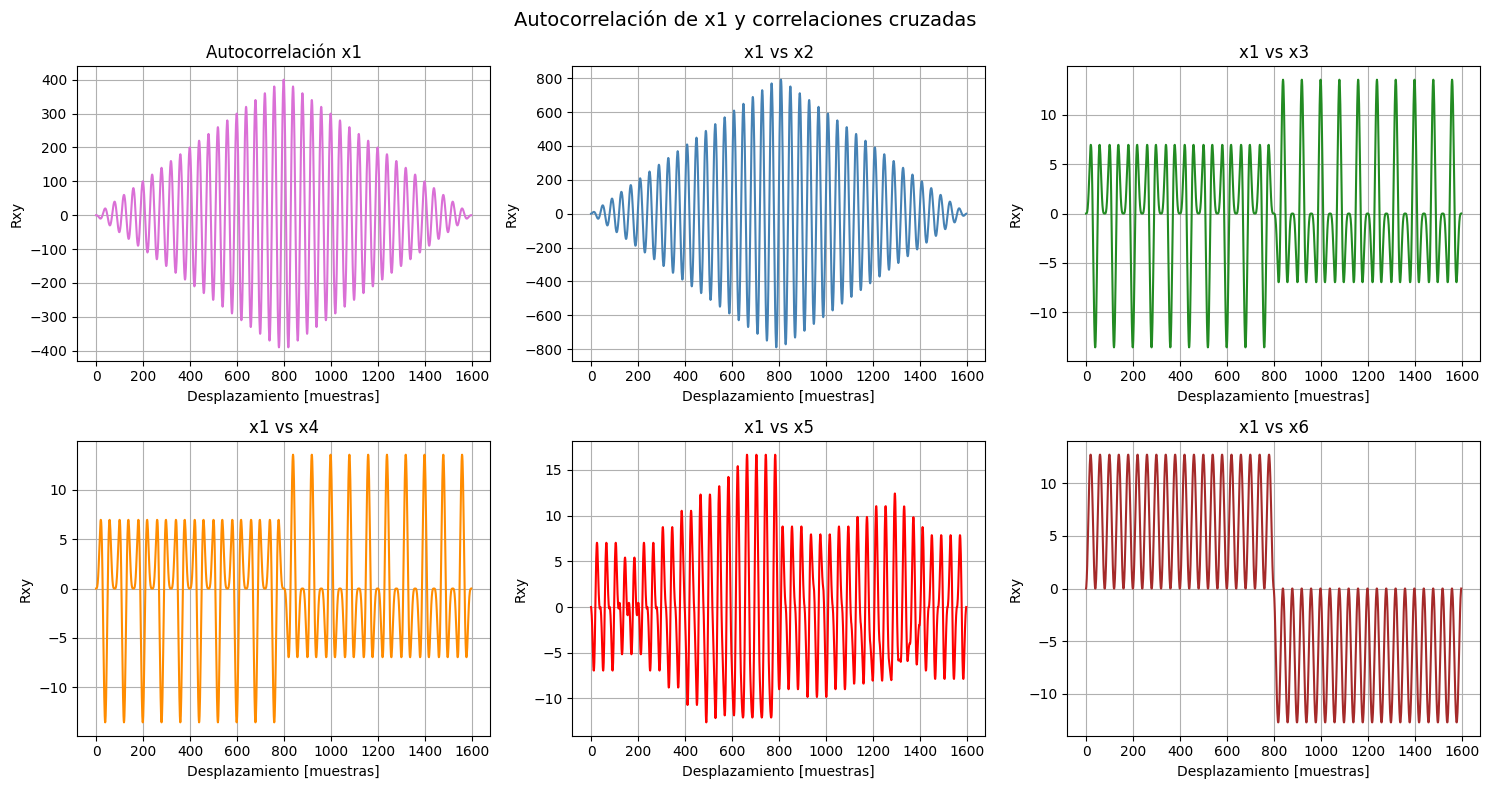

In [ ]:
import matplotlib.pyplot as plt

# Correlaciones y títulos
resultados = [
    (R_x1x1, "Autocorrelación x1"),
    (R_x1x2, "x1 vs x2"),
    (R_x1x3, "x1 vs x3"),
    (R_x1x4, "x1 vs x4"),
    (R_x1x5, "x1 vs x5"),
    (R_x1x6, "x1 vs x6"),
]

colores = ["orchid", "steelblue", "forestgreen", "darkorange", "red", "brown"]

fig, axs = plt.subplots(2, 3, figsize=(15, 8))

for ax, (R, titulo), color in zip(axs.flat, resultados, colores):
    ax.plot(R, color=color)
    ax.set_title(titulo)
    ax.set_xlabel("Desplazamiento [muestras]")
    ax.set_ylabel("Rxy")
    ax.grid(True)

plt.suptitle("Autocorrelación de x1 y correlaciones cruzadas", fontsize=14)
plt.tight_layout()
plt.show()


**Gráficos obtenidos**

Se presentan los siguientes resultados en una figura con 6 subgráficos:

1. Autocorrelación de la senoidal de 2\kHz ($x_1$).  
2. Correlación de $x_1$ con $x_2$ (senoide amplificada y desfasada $\pi/2$).  
3. Correlación de $x_1$ con $x_3$ (senoide modulada).  
4. Correlación de $x_1$ con $x_4$ (senoide modulada recortada al 75%).  
5. Correlación de $x_1$ con $x_5$ (cuadrada de 4\kHz).  
6. Correlación de $x_1$ con $x_6$ (pulso rectangular de $10$ ms).  

Cada subgráfico está en distinto color y permite apreciar:  
- La autocorrelación ($x_1$ vs $x_1$) muestra la forma esperada en “triángulo” modulado por la propia señal.  
- Las correlaciones cruzadas presentan amplitudes mucho menores, lo cual es consistente con la baja similitud entre señales diferentes.  

---

## 4) Propiedad trigonométrica y verificación con señales

Queremos demostrar la identidad:

$$
2 \cdot \sin(\alpha) \cdot \sin(\beta) = \cos(\alpha - \beta) - \cos(\alpha + \beta)
$$

### 4.1) Demostración paso a paso (usando sumas y restas)

1. **Parto del lado derecho** y desarrollo con las fórmulas de cosenos:

$$
\cos(\alpha - \beta) = \cos\alpha \cdot \cos\beta + \sin\alpha \cdot \sin\beta
$$

$$
\cos(\alpha + \beta) = \cos\alpha \cdot \cos\beta - \sin\alpha \cdot \sin\beta
$$

2. **Resto** término a término:

$$
\cos(\alpha - \beta) - \cos(\alpha + \beta) =
(\cos\alpha \cos\beta + \sin\alpha \sin\beta) -
(\cos\alpha \cos\beta - \sin\alpha \sin\beta)
$$

3. **Se cancelan** los términos $\cos\alpha \cos\beta$ y se suman los términos con seno:

$$
\cos(\alpha - \beta) - \cos(\alpha + \beta) =
\sin\alpha \sin\beta + \sin\alpha \sin\beta
$$

4. **Resultado**:

$$
\cos(\alpha - \beta) - \cos(\alpha + \beta) = 2 \sin\alpha \sin\beta
$$

Con esto queda demostrada la identidad.

### 4.2) Verificación con señales (caso $\alpha = 2\beta$)

Defino:

$$
\alpha(t) = \omega_\alpha t, 
\qquad 
\beta(t) = \omega_\beta t
$$

con

$$
\omega_\alpha = 2\pi f_\alpha, 
\qquad 
\omega_\beta = 2\pi f_\beta
$$

Tomo $f_\alpha = 2 f_\beta$, por lo tanto:

$$
\alpha(t) = 2\beta(t)
$$

Elijo:

$$
f_\beta = 1\,\text{kHz}, 
\qquad 
f_\alpha = 2\,\text{kHz}
$$

- **Lado izquierdo (LHS):**

$$
LHS(t) = 2 \sin(\alpha(t)) \cdot \sin(\beta(t)) 
       = 2 \sin(2\pi f_\alpha t)\cdot \sin(2\pi f_\beta t)
$$

- **Lado derecho (RHS):**

$$
RHS(t) = \cos(\alpha(t) - \beta(t)) - \cos(\alpha(t) + \beta(t))
$$

Si la igualdad es correcta, al graficar $LHS(t)$ y $RHS(t)$ deben coincidir.  
La diferencia 

$$
e(t) = LHS(t) - RHS(t)
$$

debe ser aproximadamente cero (sólo aparece un error numérico muy pequeño).


Error máximo |LHS - RHS| = 1.432e-14


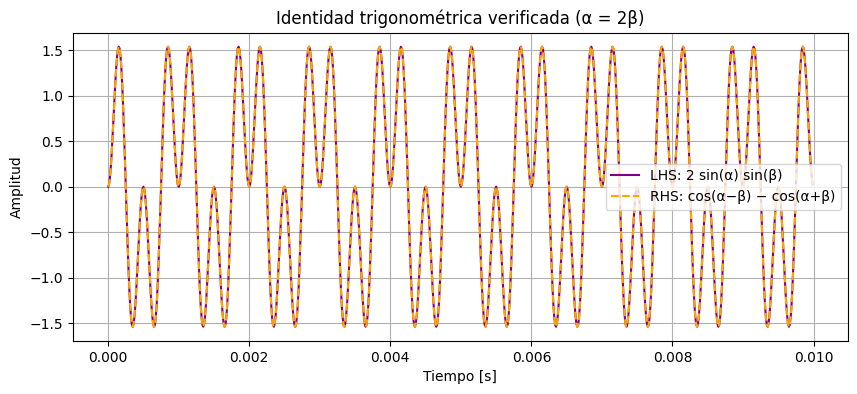

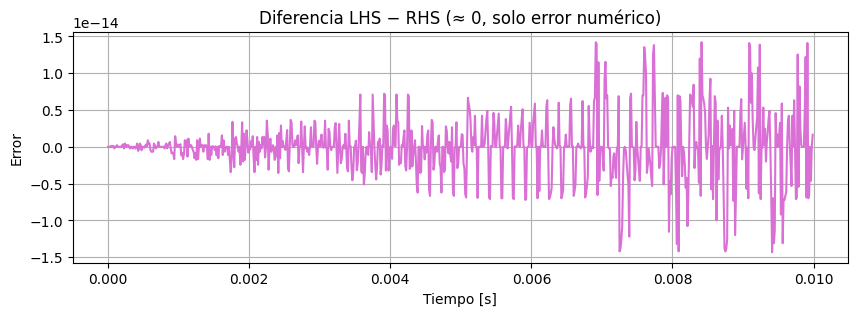

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fs = 80000
T  = 0.01
N  = int(fs*T)
t  = np.arange(N)/fs

# Frecuencias: f_alpha = 2 * f_beta
f_beta  = 1000
f_alpha = 2000

alpha = 2*np.pi*f_alpha*t
beta  = 2*np.pi*f_beta*t

# Lados de la igualdad
lhs = 2*np.sin(alpha)*np.sin(beta)
rhs = np.cos(alpha - beta) - np.cos(alpha + beta)

# Error máximo absoluto
err_max = np.max(np.abs(lhs - rhs))
print("Error máximo |LHS - RHS| =", f"{err_max:.3e}")

plt.figure(figsize=(10,4))
plt.plot(t, lhs, label="LHS: 2 sin(α) sin(β)", color='purple')
plt.plot(t, rhs, '--', label="RHS: cos(α−β) − cos(α+β)", color='orange')
plt.title("Identidad trigonométrica verificada (α = 2β)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()
plt.show()

# Diferencia (~0)
plt.figure(figsize=(10,3))
plt.plot(t, lhs - rhs, color='orchid')
plt.title("Diferencia LHS − RHS (≈ 0, solo error numérico)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Error")
plt.grid(True)
plt.show()


### Resultados 

Al graficar las funciones $LHS(t)$ y $RHS(t)$ se observa que ambas coinciden
prácticamente en toda la ventana de observación.  
La diferencia $e(t) = LHS(t) - RHS(t)$ resulta del orden de $10^{-15}$,
lo cual confirma que la igualdad trigonométrica se cumple numéricamente.  

En conclusión, la verificación experimental con señales discretas valida
la identidad trigonométrica demostrada analíticamente.

---

## 5) Bonus: Señal de audio (.wav)

En este punto se propone trabajar con una señal de audio real descargada de **freesound.org** en formato `.wav`.

### Procedimiento:

1. Cargo el archivo `.wav` en Python.  
2. Extraigo:
   - **Frecuencia de muestreo** ($f_s$)  
   - **Número total de muestras** ($N$)  
   - **Duración** de la señal ($T = N / f_s$).  
3. Grafico la forma de onda en el dominio del tiempo.  
4. Calculo la **energía total** de la señal con:

$$
E = \sum_{n=0}^{N-1} x^2[n] \cdot \Delta t
\qquad \text{con} \quad \Delta t = \tfrac{1}{f_s}
$$

donde $x[n]$ representa las muestras de la señal digitalizada.

---

### Consideraciones:

- Si el archivo es estéreo, trabajo solo con un canal (ej. el izquierdo).  
- La energía se interpreta como una medida de “intensidad” acumulada a lo largo de la duración de la señal.  
- A diferencia de los casos anteriores (señales periódicas), aquí no tiene sentido hablar de **potencia promedio**, sino de **energía total**, ya que la señal es de duración finita.


----

## Archivo elegido

En este bonus cargo un archivo de audio real en formato WAV, lo grafico en el dominio temporal y calculo su energía.

Elijo el archivo `la cucaracha.wav` (duración aproximada 3 segundos).  
Muestro:
- frecuencia de muestreo,  
- número total de muestras,  
- duración,  
- energía total.

Finalmente, grafico la forma de onda completa para visualizar su evolución temporal.


Archivo: la cucaracha.wav
Frecuencia de muestreo: 48000 Hz
Número de muestras: 144000
Duración: 3.000 s
Energía total: 0.005668832481043258


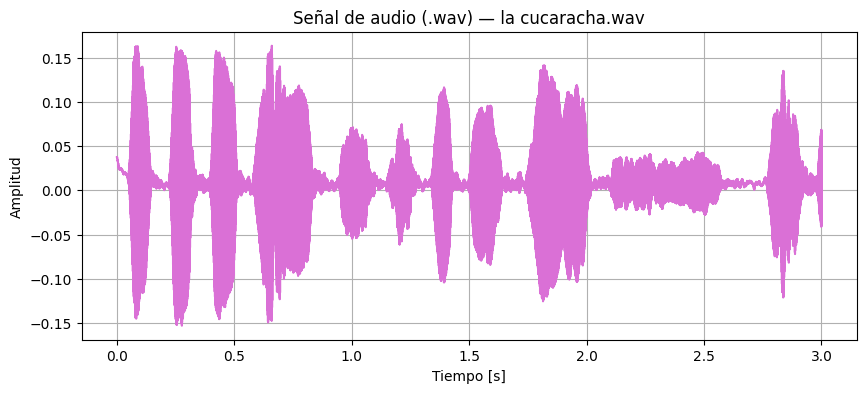

In [ ]:
from pathlib import Path
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

# Ruta absoluta del archivo WAV
AUDIO_PATH = Path(r"D:\Segundo Cuatrimestre 2025\APS\APS-VSC\pdstestbench\la cucaracha.wav")

# Cargar WAV
fs, data = wavfile.read(str(AUDIO_PATH))

# Si es estéreo, usar un canal
if data.ndim > 1:
    data = data[:,0]

# Parámetros básicos
N = len(data)
dt = 1/fs
T = N/fs
t = np.arange(N)/fs

# Energía total
data = data.astype(float)
energia = np.sum(data**2) * dt

print("Archivo:", AUDIO_PATH.name)
print("Frecuencia de muestreo:", fs, "Hz")
print("Número de muestras:", N)
print("Duración:", f"{T:.3f}", "s")
print("Energía total:", energia)

plt.figure(figsize=(10,4))
plt.plot(t, data, color="orchid")
plt.title(f"Señal de audio (.wav) — {AUDIO_PATH.name}")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()


### Resultados

Se cargó el archivo de audio `la cucaracha.wav` y se analizaron sus parámetros básicos:

- Frecuencia de muestreo: $f_s = 48000 \,\text{Hz}$
- Número de muestras: $N = 144000$
- Duración total: $T = 3.0 \,\text{s}$
- Energía total de la señal: $E \approx 0.00567$

En la gráfica temporal se aprecia la forma de onda del audio real,
con sus variaciones de amplitud a lo largo de los 3 segundos.


----

## Conclusiones

A lo largo de este trabajo práctico se sintetizaron, procesaron y analizaron
distintas señales en el dominio temporal.

- Se comprobó que la potencia y la energía dependen de la naturaleza de la señal
(periódica o de duración finita).  
- La verificación de ortogonalidad mostró que la mayoría de las señales fueron
ortogonales en la ventana de observación.  
- La autocorrelación y las correlaciones cruzadas confirmaron las similitudes
y diferencias entre las señales.  
- La identidad trigonométrica planteada se demostró tanto analíticamente como
numéricamente, con error despreciable.  
- En el bonus, se aplicaron las mismas herramientas sobre un audio real en formato `.wav`,
demostrando la utilidad práctica del análisis.

En conjunto, el trabajo permitió afianzar conceptos teóricos de señales y
conectarlos con simulaciones prácticas en Python.


## Autoevaluación

- Resolví la tarea, pero aún tengo algunas dudas teóricas.  

**Lo que aprendí:**  
Pude reforzar el manejo de conceptos como potencia, energía, ortogonalidad,
correlación y modulación, y llevarlos a la práctica en Python.  
Además, entendí mejor cómo aplicar estas herramientas sobre una señal real
de audio digitalizada.

**Lo que me quedó claro:**  
Cómo implementar en código las definiciones matemáticas vistas en clase
y verificar que los resultados coincidan con lo esperado.  
También cómo usar gráficos para interpretar de forma visual
los fenómenos de modulación, recorte y correlación.

**Lo que me sigue costando:**  
Algunas cuestiones teóricas de fondo, como la interpretación más profunda
de la ortogonalidad entre señales no sinusoidales o el efecto exacto del
recorte en el espectro de la señal.

**Uso de IA en la resolución:**  
Sí, realicé consultas específicas a una IA en varios puntos, por ejemplo:  
- Cómo escribir correctamente en Markdown (ej. punto 4).  
- Ajustar el código del recorte de amplitud (ítem d).  
- Resolver detalles del código del bonus con el archivo `.wav`.  
- Consultas puntuales sobre funciones de Python y su uso en correlaciones.  

El desarrollo general y la ejecución de los códigos los realicé por mi cuenta.
